In [1]:
cb_metrics_file = "/Users/simon.hughes/BitBucket/Dissertation/Results/causal/CB_metrics_causal_and_concepts_only.txt"
sc_metrics_file = "/Users/simon.hughes/BitBucket/Dissertation/Results/causal/SC_metrics_causal_and_concepts_only.txt"

In [2]:
def get_test_metric(substr):
    splt = substr.strip().split(" ")
    return splt[-1]

def parse_metrics(fname):
    with open(fname) as f:
        lines = f.readlines()
    
    sentence_metrics = False
    current_tag = ""
    current_metrics = None
    metrics = []
    for line in lines:
        line = line.strip()
        if line.startswith("SENTENCE"):
            sentence_metrics = True
            continue
        if "MEAN" in line:
            sentence_metrics = False
            continue
        if sentence_metrics:
            if not line:
                continue

            if line.startswith("TAG:"):
                if current_metrics:
                    metrics.append(current_metrics)
                
                current_tag = line[4:].strip()
                current_metrics = {"code": current_tag}
                
            elif line.startswith("f1:"):
                f1score = float(get_test_metric(line[3:]))
                current_metrics["f1"] = f1score
                
            elif line.startswith("recall:"):
                recall = float(get_test_metric(line[7:]))
                current_metrics["recall"] = recall
                
            elif line.startswith("precision:"):
                precision = float(get_test_metric(line[10:]))
                current_metrics["precision"] = precision
            
            elif line.startswith("sentences:"):
                num_sents = float(get_test_metric(line[10:]))
                current_metrics["sentences"] = num_sents

    metrics.append(current_metrics)
    return metrics

In [3]:
cb_metrics = parse_metrics(cb_metrics_file)
sc_metrics = parse_metrics(sc_metrics_file)
len(cb_metrics), len(sc_metrics)

(50, 38)

In [4]:
cb_codes = map(lambda m: m["code"], cb_metrics)
sc_codes = map(lambda m: m["code"], sc_metrics)
len(cb_codes), len(sc_codes)

(50, 38)

In [5]:
cb_cr_metrics = filter(lambda m: "->" in m["code"], cb_metrics)
sc_cr_metrics = filter(lambda m: "->" in m["code"], sc_metrics)
len(cb_cr_metrics), len(sc_cr_metrics)

(38, 29)

In [6]:
import matplotlib

import numpy as np
import pandas as pd

from math import sqrt
SPINE_COLOR = 'gray'

In [28]:
import matplotlib as mpl
mpl.use('pgf')

def figsize(scale):
    fig_width_pt = 469.755                          # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

"""pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    #"font.family": "serif",
    #"font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    #"font.sans-serif": [],
    #"font.monospace": [],
    #"axes.labelsize": 10,               # LaTeX default is 10pt font.
    #"text.fontsize": 10,
    #"legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    #"xtick.labelsize": 8,
    #"ytick.labelsize": 8,
    "figure.figsize": figsize(0.9),     # default fig size of 0.9 textwidth
    #"pgf.preamble": [
    #    r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
    #    r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
    #    ]
    }
mpl.rcParams.update(pgf_with_latex)
"""

import matplotlib.pyplot as plt

# I make my own newfig and savefig functions
def newfig(width):
    plt.clf()
    fig = plt.figure(figsize=figsize(width))
    ax = fig.add_subplot(111)
    return fig, ax

def savefig(filename):
    #plt.savefig('{0}.pgf'.format(filename))
    plt.savefig('{0}.png'.format(filename))

In [29]:
from matplotlib import pylab as plt
%matplotlib inline

In [30]:
def plot_metric_vs_sentence_count(metric, title, xlabel):
    ax2 = plt.axes([0, 0.6, 2, 1.5])
    format_axes(ax2)
    #plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Number of Sentences')

    xs = np.asarray(map(lambda m: m[metric], cb_cr_metrics) + map(lambda m: m[metric], sc_cr_metrics))
    ys = np.asarray(map(lambda m: m["sentences"], cb_cr_metrics) + map(lambda m: m["sentences"], sc_cr_metrics))

    plt.xlim([0, 1.0])
    plt.ylim([-10, max(ys) + 50])
    ax2.scatter(xs, ys, alpha=1.0)

    # determine best fit line
    par = np.polyfit(xs, ys, 1, full=True)
    slope=par[0][0]
    intercept=par[0][1]
    xl = [0.0, 1.0]
    yl = [slope*xx + intercept for xx in xl]
    plt.plot(xl, yl, '-r')

    plt.show()
    
from scipy.stats.stats import pearsonr

def pearson_correl(metric):
    xs = np.asarray(map(lambda m: m[metric], cb_cr_metrics) + map(lambda m: m[metric], sc_cr_metrics))
    ys = np.asarray(map(lambda m: m["sentences"], cb_cr_metrics) + map(lambda m: m["sentences"], sc_cr_metrics))
    return pearsonr(xs,ys)

In [33]:
def save_plot_of_metric_vs_sentence_count(metric, xlabel, image_file_name):
    fig, ax  = newfig(1.5)
    
    plt.xlabel(xlabel)
    plt.ylabel('Number of Sentences')
    
    xs = np.asarray(map(lambda m: m[metric], cb_cr_metrics) + map(lambda m: m[metric], sc_cr_metrics))
    ys = np.asarray(map(lambda m: m["sentences"], cb_cr_metrics) + map(lambda m: m["sentences"], sc_cr_metrics))

    plt.xlim([0, 1.0])
    plt.ylim([-10, max(ys) + 50])
    ax.scatter(xs, ys, alpha=1.0)

    # determine best fit line
    par = np.polyfit(xs, ys, 1, full=True)
    slope=par[0][0]
    intercept=par[0][1]
    xl = [0.0, 1.0]
    yl = [slope*xx + intercept for xx in xl]
    ax.plot(xl, yl, '-r')

    savefig(image_file_name)

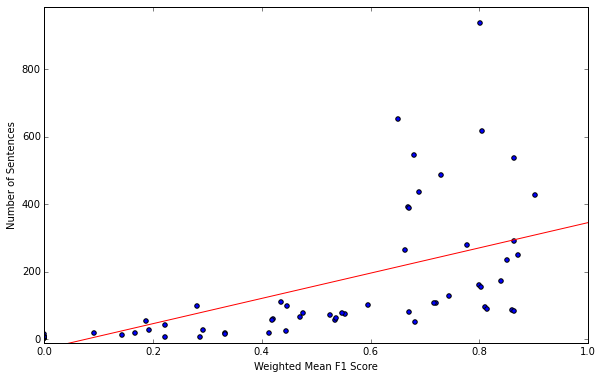

In [34]:
save_plot_of_metric_vs_sentence_count("f1", "Weighted Mean F1 Score", "/Users/simon.hughes/BitBucket/Dissertation/Dissertation/images/f1_vs_frequency")

In [ ]:
plot_metric_vs_sentence_count("f1", "Impact of Frequency on Causal Relation F1 Score", 'F1 Score')

In [ ]:
plot_metric_vs_sentence_count("recall", "Impact of Frequency on Causal Relation Recall", 'Recall')

In [ ]:
plot_metric_vs_sentence_count("precision", "Impact of Frequency on Causal Relation Precision", 'Precision')

In [35]:
"""
From the docs:

 Returns
 -------
 (Pearson's correlation coefficient,
  2-tailed p-value)

"""

print "f1       ", pearson_correl("f1")
print "recall   ", pearson_correl("recall")
print "precision", pearson_correl("precision")

f1        (0.60915032300191052, 4.5020680138573836e-08)
recall    (0.62757604856463811, 1.3197340887091378e-08)
precision (0.42779527535686068, 0.00030502512295745666)


In [36]:
len(cb_cr_metrics) + len(sc_cr_metrics)

67